# Homework 3: Data Frames and Graphs  (50 points)

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas.




**Reading**: 

Data8 textbook chapters [5](https://inferentialthinking.com/chapters/05/Sequences.html) and [7.1-7.2](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html).

**Deadline**:

This assignment is due on Thursday, October 20 at 9:00am. Late work will not be accepted unless you have made special arrangements with the instructors.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. CTA (20 points)

This exercise will look at a dataset from the Chicago Transit Authority, `CTA - Ridership - Daily Boarding Totals`, available from the Chicago Data Portal 
https://data.cityofchicago.org/Transportation/CTA-Ridership-Daily-Boarding-Totals/6iiy-9s97 
and downloaded on October 4, 2022

This is a 20-year timeseries of total bus and train utilization. The readme file on this data is here:
https://data.cityofchicago.org/api/assets/5175CFDE-CA9A-498C-BB1C-8A86B780CCF1

In [2]:
# specify the correct path to the file and run this
cta= pd.read_csv("./data/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
cta.head(5)

,service_date,day_type,bus,rail_boardings,total_rides
0,01/01/2001,U,297192,126455,423647
1,01/02/2001,W,780827,501952,1282779
2,01/03/2001,W,824923,536432,1361355
3,01/04/2001,W,870021,550011,1420032
4,01/05/2001,W,890426,557917,1448343


In [3]:
# run this
type(cta.iloc[0,0])

str

As you see in the output of the above cell, the `service_date` entries are strings. The next cell converts the (string) dates into pandas.datetime format and assigns them to a new column called `Date`. We also show you how to extract the year from the `Date` column (you might need to extract other parts of the date so read the code carefully).

In [4]:
# run this
cta['Date']=pd.to_datetime(cta.service_date)
cta['Year'] = cta['Date'].dt.year
cta.tail(5)

,service_date,day_type,bus,rail_boardings,total_rides,Date,Year
7939,07/27/2022,W,446320,340006,786326,2022-07-27,2022
7940,07/28/2022,W,448728,380517,829245,2022-07-28,2022
7941,07/29/2022,W,430804,378849,809653,2022-07-29,2022
7942,07/30/2022,A,304052,327388,631440,2022-07-30,2022
7943,07/31/2022,U,224307,252781,477088,2022-07-31,2022


The `datetime` data format has other useful features with some more illustrated in the cell below for the last date in the dataset.


In [5]:
# run this
[cta.Date[7943].year,cta.Date[7943].month, cta.Date[7943].day, cta.Date[7943].dayofweek]

[2022, 7, 31, 6]

**Question 1**. What period of time does the dataset cover (dates are ordered)? Calculate the number of days in that period. 

In [6]:
cta['Date'].head(1)

0   2001-01-01
Name: Date, dtype: datetime64[ns]

In [7]:
cta['Date'].tail(1)

7943   2022-07-31
Name: Date, dtype: datetime64[ns]

2001-01-01 to 2022-07-31

In [8]:
cta['Date'][7943]-cta['Date'][0]

Timedelta('7881 days 00:00:00')

**Question 2** How many rows does the dataset have?  Are any dates missing?


In [9]:
cta.shape[0]

7944

In [10]:
pd.date_range(start = '2001-01-01', end = '2022-07-31' ).difference(cta['Date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

*Answer here:* 7944 rows. No missing dates.

**Question 3** Generate a line plot of CTA total_rides for the **past five years** (since 01/01/20217).

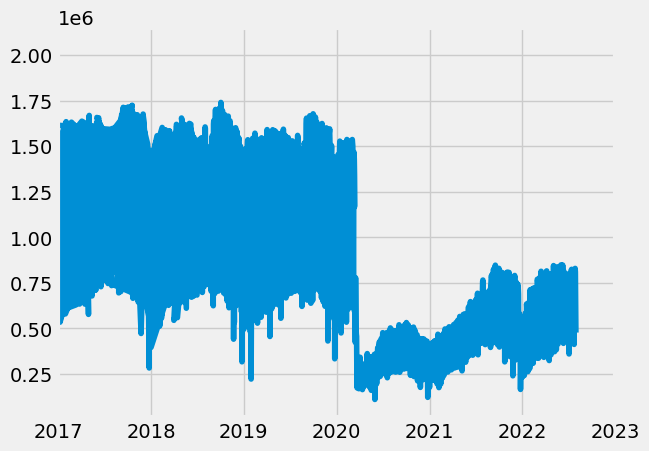

In [11]:
plt.xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2023-01-01")))
plt.plot(cta['Date'],cta['total_rides'])

**Question 4** Compare total CTA ridership for the months of January in 2019 and 2022.
By approximately how much has ridership fallen from 2019 to 2022? 

In [12]:
cta.query("Date.dt.year == 2019 and Date.dt.month == 1")['total_rides'].sum() - cta.query("Date.dt.year == 2022 and Date.dt.month == 1")['total_rides'].sum()

19185997

Ridership has fallen around 19,185,997 in total between the three years

**Question 5** Make a scatter plot of train boardings vs. bus ridership.  Comment on the graph.  (What do you see?)  Make sure you add adequate labels. 

<AxesSubplot:xlabel='Date'>

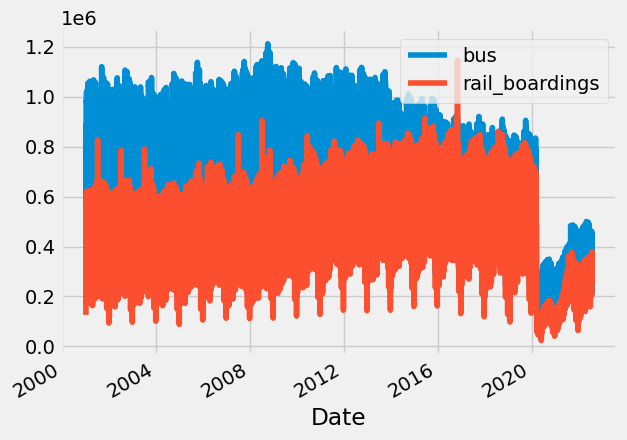

In [13]:
cta[['Date','bus','rail_boardings']].plot('Date')

We see that bus ridership consistently exceeds rail. Ridership numbers were converging in the pre pandemic period but after the pandemic we see bus 

**Question 6** Are there unusual days in the next plot (code provided below)? For the unusual days you find, provide an explanation.
                                                                                          

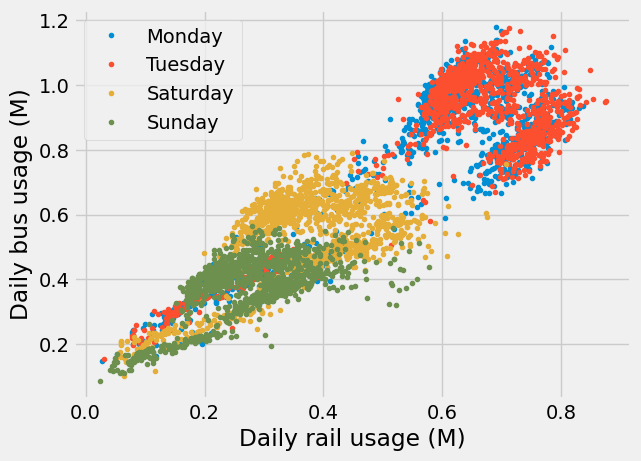

In [14]:
# run this cell
cta["dayofweek"] =cta['Date'].dt.dayofweek
dow = {0:"Monday", 1:"Tuesday", 5:"Saturday", 6:"Sunday"} 
for i in [0,1,5,6]: 
    r = (cta.dayofweek == i)
    plt.plot(cta.rail_boardings[r]/1E6, cta.bus[r]/1e6, '.', label = dow[i])
plt.legend()
plt.xlabel("Daily rail usage (M)")
plt.ylabel("Daily bus usage (M)");

*Answer here:* Saturday and Sunday have clearly lower daily rail and bus usage compared to Monday and Tuesday which intuitively makes sense since during the week, workers use the CTA to commute. However, I am unsure of why Sunday sees less usage generally than Saturday.

## 2. Colleges (15 points)


This exercise uses data on colleges from Homework 1. Recall that the dataset was posted on Kaggle at the beginning of 2018, and was grabbed from US-News: https://www.usnews.com. It includes statistics for 311 US Universities. 

To make your tasks easiear, we removed many of the columns and kept only 11. The corresponding file can be found here:

http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv


#### Run the next cell that contains code that will allow you to read the data into a data frame called `colleges_df`. It also shows the first 10 rows.


In [15]:
# Just run this cell.

colleges_df=pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/colleges1.csv')
colleges_df.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
5,33.0,1460.0,4524.0,8.0,95.0,58.0,20331.0,49892,Massachusetts Institute of Technology,5,private
6,31.0,1380.0,7034.0,5.0,95.0,47.0,19296.0,49617,Stanford University,5,private
7,32.0,1380.0,10019.0,9.0,93.0,47.0,25441.0,53534,University of Pennsylvania,8,private
8,31.0,1380.0,6609.0,11.0,92.0,41.0,23374.0,53744,Duke University,9,private
9,34.0,1510.0,979.0,8.0,91.0,51.0,23973.0,49908,California Institute of Technology,10,private


**Run the following command that will make a scatterplot of SAT average scores (x-axis) and tuition (y-axis).**

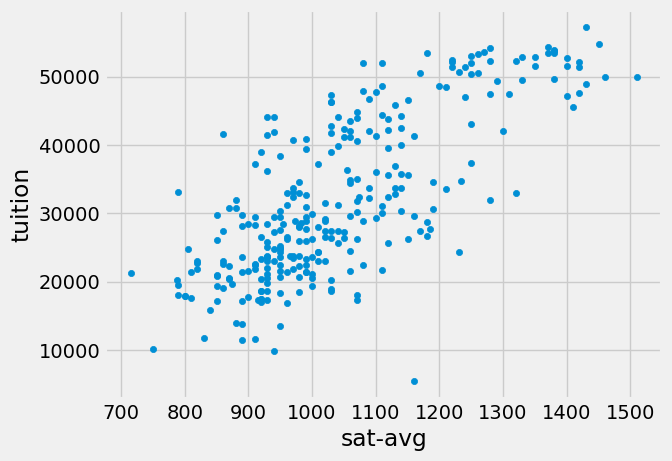

In [16]:
colleges_df.plot.scatter(x='sat-avg',y='tuition');

**Question 1.**  Describe in few words the pattern you see. What is a possible explanation for this pattern?

There is a correlation between average SAT score and tuition. One possible explanation is that the schools that have higher average SAT are typically more likely to be either private institutions or, more generally, institutions that command greater respect and have more prestige, thus being able to charge higher prices to attend.

**Question 2.** Draw a scatterplot of SAT average (x-axis) and 'cost-after-aid' (y-axis) and then describe the pattern you see. Provide an explanation for this pattern.

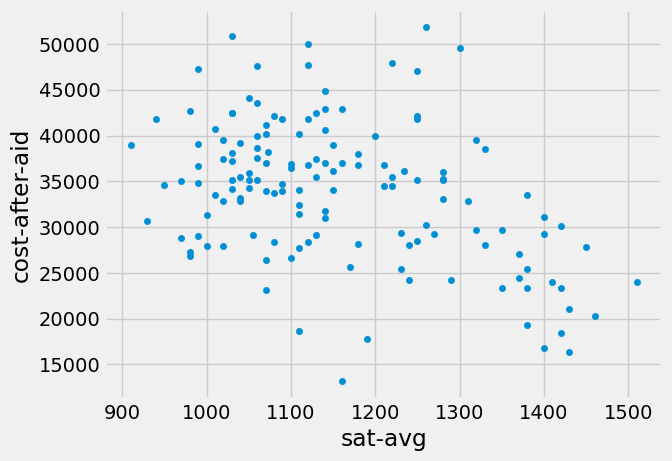

In [17]:
colleges_df.plot.scatter(x='sat-avg',y='cost-after-aid');

It appears that generally as average SAT score increases, cost-after-aid decreases. This could be because the more prestigious schools tend to have larger endowments, allowing them to provide more generous aid, thus offsetting the higher tuition we saw earlier.

**Question 3.** Construct a data frame that contains the colleges for which 'percent-receiving-aid' is greater than 0. Call this data frame `aid_df`.

Note that this dataset has missing data points (for example, not all colleges report the percentage of students who receive aid), and the table you created has eliminated the colleges with no information on aid.

In [18]:
aid_df=colleges_df[colleges_df['percent-receiving-aid']>0]

**Question 4.**  Calculate the proportion of students who receive aid in private universities. Similarly calculate the
proportion of students who receive aid in public universities. (Hint: the answer will not come from directly averaging  the 'percent-receiving-aid' column)

In [19]:
# use this cell to write the code that will output the two numbers
aid_df.groupby('institutionalControl')['percent-receiving-aid'].mean()

institutionalControl
private    47.718310
public     23.013889
Name: percent-receiving-aid, dtype: float64

**Question 5.** Construct a data frame with two rows (for private and public) and two columns: (i) first column should contain the strings 'public' and 'private'; (ii) second column should contain the percent of students receiving aid that you calculated in Question 4.

In [20]:
temp = pd.Series(aid_df.groupby('institutionalControl')['percent-receiving-aid'].mean())
df_5 = temp.reset_index()
df_5

,institutionalControl,percent-receiving-aid
0,private,47.718310
1,public,23.013889


**Question 6.** Make a bar chart that shows the aid information in the table you created for  Question 5.

**Note:** Graphs aren't very useful without accurate labels.  

<AxesSubplot:xlabel='institutional control', ylabel='Percent Receiving Aid'>

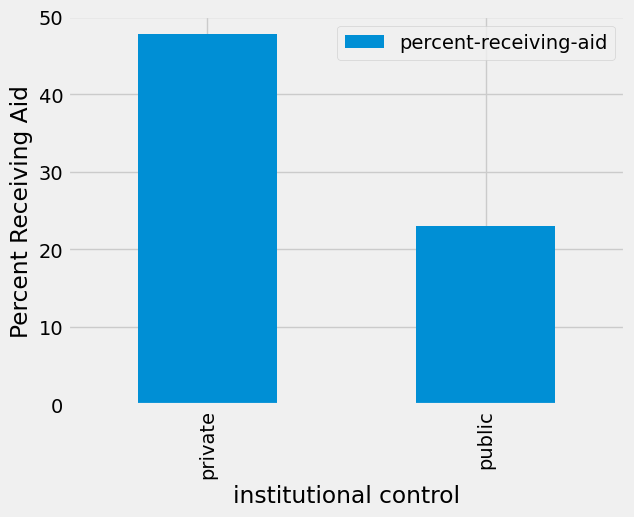

In [21]:
df_5.plot.bar(x = 'institutionalControl',xlabel = 'institutional control',ylabel = 'Percent Receiving Aid')

## 3. Seattle Public Library Circulation (15 points)
For this exercise we use a dataset, dating to 2005, of titles checked out at the Seattle Public Library. Since this dataset is voluminous, we have taken a random sample of 1/1000 of the data without replacement.   This dataset is distrubted from the Seattle Open Data Portal: 
https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

You can read about the origin of the dataset Walsh, Melanie "Where is all the Book Data?"  2022-10-04  https://www.publicbooks.org/where-is-all-the-book-data/ at publicbooks.org.

In [22]:
spl_df= pd.read_csv("http://www.stat.uchicago.edu/~nicolae/118/Checkouts.sample.csv")
spl_df.head(5)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,VIDEODISC,2016,4,1,"JammX kids. Adventure one, Can't dance don't w...",NaN,NaN,"Dance parties Juvenile drama, Hip hop Juvenile...",Lightforce Entertainment ; Distributed by Warn...,2006.
1,Digital,Hoopla,TELEVISION,2016,4,2,Dogs Decoded,NaN,NaN,Science,PBS,NaN
2,Digital,OverDrive,EBOOK,2016,4,1,"Hunter's Oath: Sacred Hunt Series, Book 1",NaN,Michelle West,"Fantasy, Fiction","Penguin Group (USA), Inc.",2013
3,Physical,Horizon,SOUNDDISC,2016,4,2,Arkology [sound recording] / [Lee Scratch Perry].,NaN,"Perry, Lee, 1936-",Reggae music,"Island Jamaica,",p1997.
4,Digital,OverDrive,EBOOK,2016,4,1,The Art of Eating In: How I Learned to Stop Sp...,NaN,Cathy Erway,"Cooking & Food, Essays, Nonfiction","Penguin Group (USA), Inc.",2010


**Question 1**  Make a bar chart of the total number of items checked out by year (here we count number of items, so the entry in second row is counted once). Comment on the values in 2005, 2020, and 2022.

<AxesSubplot:xlabel='Year', ylabel='number of items checked out'>

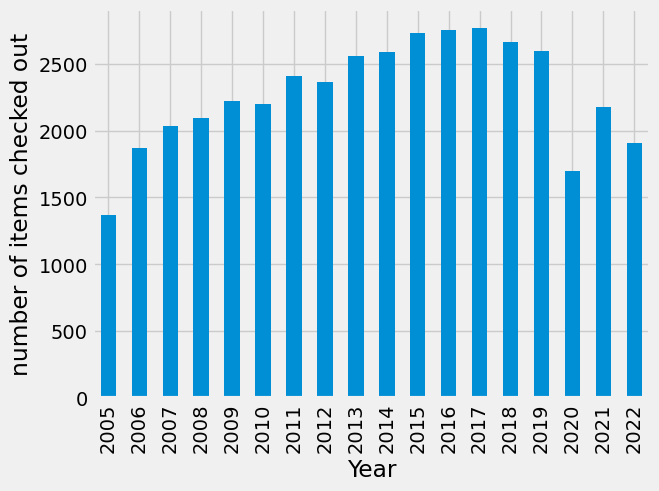

In [27]:
spl_df.groupby('CheckoutYear')['Title'].count().plot.bar(xlabel = 'Year',ylabel = 'number of items checked out')

There were few books checked out in each of these three years (2005,2020,2022) relative to the values of other years and considering the overall trend (i.e. they're outliers). 2020 is most likely due to the covid pandemic while 2022 is because the year is not yet over and so we could continue to see the recovery in total items checked out that we saw in 2021.

**Question 2** How did the pandemic interact with long-term trends in library / media 
consumption?  Using the data in the column `UsageClass` make a line graph plot that has two line trends, one for "DIGITAL" and one for "PHYSICAL". Comment on the trends you see in the graph. 	

UsageClass
Digital     AxesSubplot(0.08,0.07;0.87x0.81)
Physical    AxesSubplot(0.08,0.07;0.87x0.81)
Name: Title, dtype: object

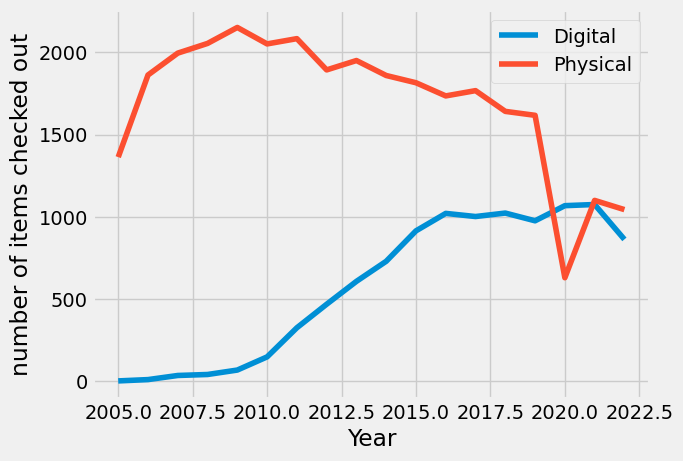

In [45]:
temp = spl_df.groupby(['CheckoutYear','UsageClass'],as_index=False)['Title'].count()
temp.set_index('CheckoutYear',inplace=True)
temp.groupby('UsageClass')['Title'].plot.line(xlabel = 'Year',ylabel = 'number of items checked out', legend=True)

*Answer here:* While physical books appeared to be on a downwards trend since before the pandemic, with digital on the rise, the pandemic shock accelerated the downwards spiral of physical books. However, digital books did not rise to make up for the drop in physical. 

**Question 3** We would like to see if there is some clarification on the trends in Question 2 that come from the data in column `MaterialType`. Make a line graph of BOOK, AUDIOBOOK, EBOOK, and VIDEODISK checkouts and comment on the general trends in the graph.

MaterialType
AUDIOBOOK    AxesSubplot(0.08,0.07;0.87x0.81)
BOOK         AxesSubplot(0.08,0.07;0.87x0.81)
EBOOK        AxesSubplot(0.08,0.07;0.87x0.81)
VIDEODISC    AxesSubplot(0.08,0.07;0.87x0.81)
Name: Title, dtype: object

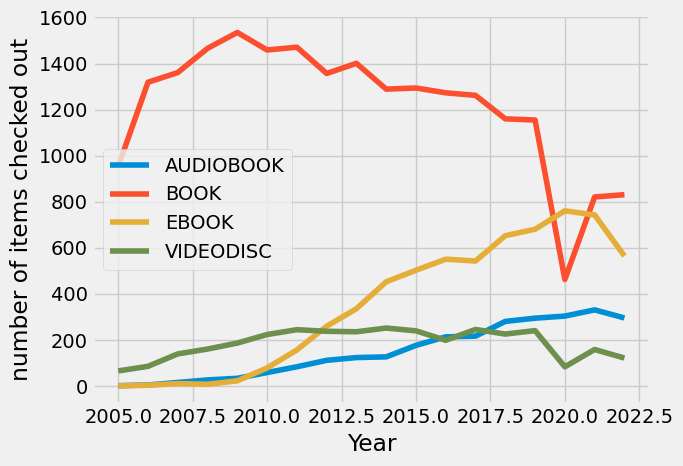

In [61]:
lst = ['BOOK', 'AUDIOBOOK', 'EBOOK', 'VIDEODISC']
temp = spl_df.query('MaterialType in @lst')
temp = temp.groupby(['CheckoutYear','MaterialType'],as_index=False)['Title'].count()
temp.set_index('CheckoutYear',inplace=True)
temp.groupby('MaterialType')['Title'].plot.line(xlabel = 'Year',ylabel = 'number of items checked out', legend=True)

*Answer here:* It appears that since 2008-9, books have been generally declining, while ebooks, and to a lesser extend, audiobooks and videodiscs are experiencing a rise in popularity. 